# Sommelier Inteligente

#### Objetivo

Construir um modelo e aplicação denominada Sommelier Inteligente que automaticamente reconheça um determinado tipo de vinho considerando os conjunto de dados.

## Passo 1. Setup do projeto

In [3]:
import joblib
import os
import urllib


import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

print('Matplot version : {}'.format(matplotlib.__version__))
print('Numpy version : {}'.format(np.__version__))
print('Pandas version : {}'.format(pd.__version__))
print('Sklearn version : {}'.format(sklearn.__version__))

Matplot version : 3.1.3
Numpy version : 1.18.1
Pandas version : 1.0.1
Sklearn version : 0.22.1


In [60]:
WINE_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/'
WINE_URL =  WINE_ROOT + 'wine.data'

DATA_PATH = os.path.join ('..', 'data','raw')
DATA_FILE = 'wine.csv'
WINE_DATA = os.path.join(DATA_PATH, DATA_FILE)

DEPLOY_PATH = os.path.join('..','app','model')
DEPLOY_FILE = 'finalized_model_wine.sav'

## Passo 2 . Recuperação de Dados

In [6]:
def download_data(data_url, data_path, data_file):
    os.makedirs(data_path, exist_ok=True)
    local_path = os.path.join(data_path, data_file)
    urllib.request.urlretrieve(data_url, local_path)

In [11]:
download_data(WINE_URL, DATA_PATH, DATA_FILE)

In [62]:
def load_data(data_path, data_file):
    local_path = os.path.join(data_path, data_file)
    return pd.read_csv(local_path, header=None, names= ['Classe','Alcohol','Malic acid',
                                                        'Ash','Alcalinity of ash',
                                                        'Magnesium','Total phenols',
                                                        'Flavanoids','Nonflavanoid phenols',
                                                        'Proanthocyanins','Color intensity',
                                                        'Hue','OD280/OD315 of diluted wines',
                                                        'Proline'])

In [64]:
wine_data = load_data(DATA_PATH, DATA_FILE)

## Passo 3 . Análise Exploratória de Dados

In [65]:
wine_data.head()

,Classe,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [66]:
wine_data.describe()

,Classe,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [67]:
wine_data['Classe'].value_counts()

2    71
1    59
3    48
Name: Classe, dtype: int64

### Correlação e distribuição

In [68]:
X = wine_data[['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
                'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity',
                'Hue','OD280/OD315 of diluted wines','Proline']]
y = wine_data['Classe']

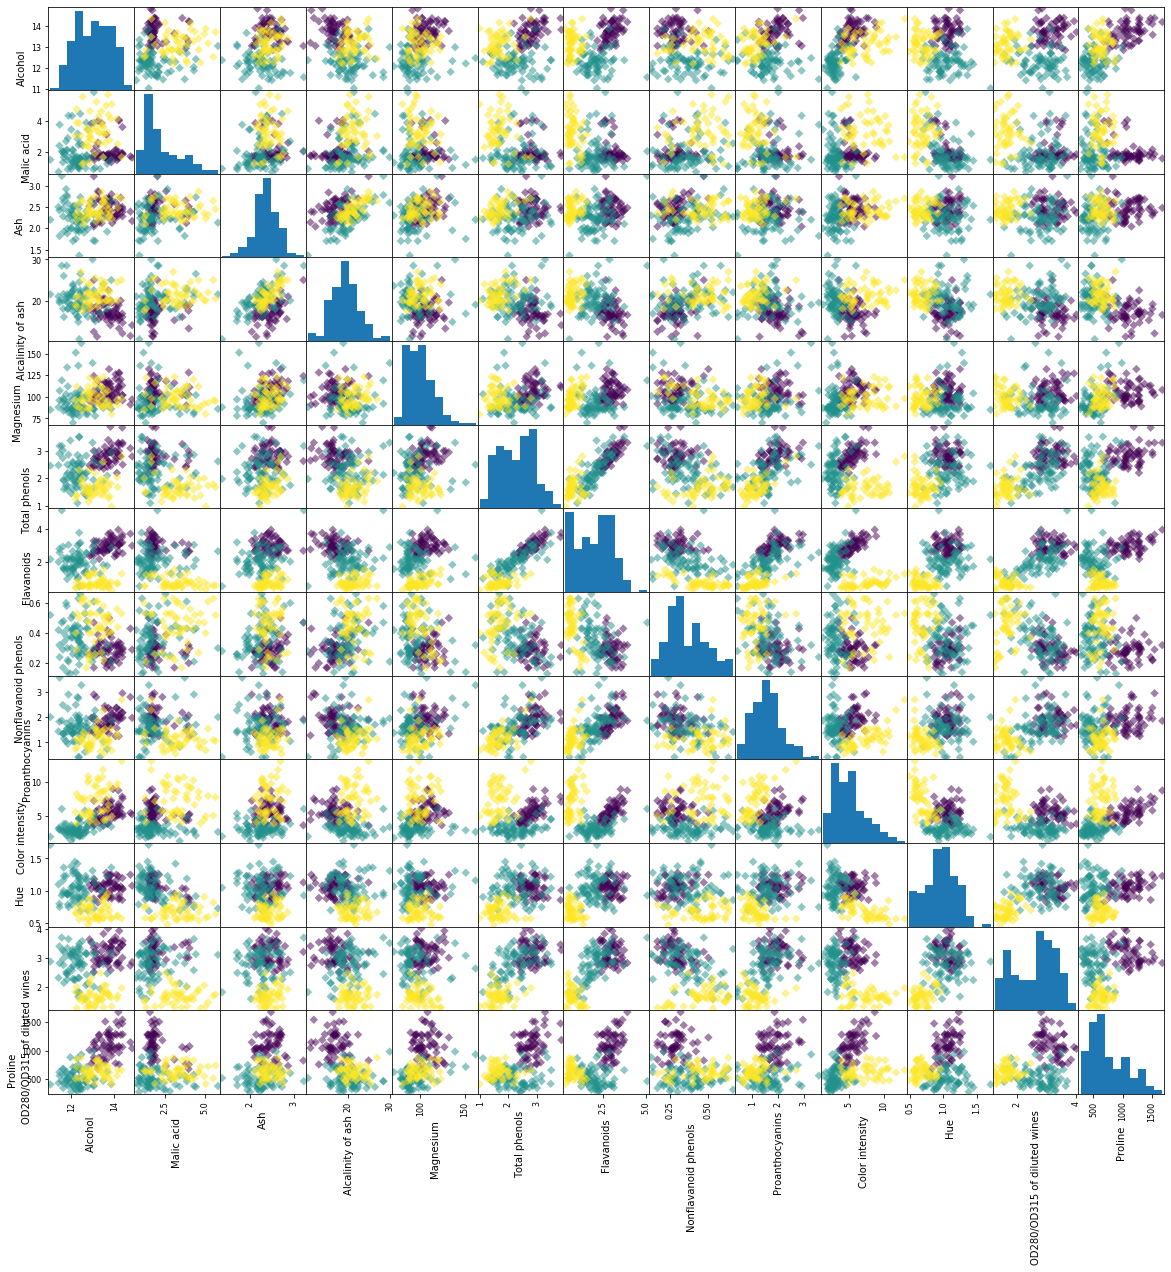

In [69]:
cores = y.astype('category').cat.codes
_ = pd.plotting.scatter_matrix(X, c=cores, figsize=[20, 20], marker='D')

for ax in _.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(90)
    ax.yaxis.label.set_ha('right')
   

## Passo 4. Treinamento do Modelo

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)

In [71]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

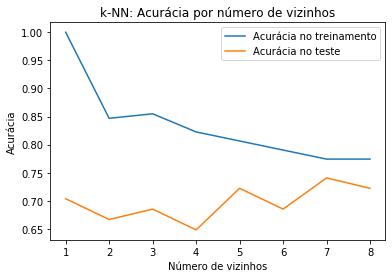

In [72]:
plt.title('k-NN: Acurácia por número de vizinhos')
plt.plot(neighbors, train_accuracy, label = 'Acurácia no treinamento')
plt.plot(neighbors, test_accuracy, label ='Acurácia no teste')
plt.legend()
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia')
plt.show()

In [73]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

## Passo 5. Testar o modelo

In [74]:
predicoes = model.predict(X_test)
print('Predições: {}'.format(predicoes))
[[1]][0] 

Predições: [1 2 1 1 1 1 2 3 2 3 2 3 3 2 1 3 2 1 1 3 2 1 3 3 3 3 1 3 1 3 3 2 3 2 3 3 3
 3 3 1 3 1 1 1 1 2 2 1 3 3 2 2 3 1]


In [75]:
acuracia = model.score(X_test, y_test)
print("Acurácia do model: {}".format(acuracia))

Acurácia do model: 0.7407407407407407


## Passo 6. Deploy do modelo

In [76]:
local_path = os.path.join(DEPLOY_PATH, DEPLOY_FILE)
joblib.dump(model, local_path)

['..\\model\\finalized_model_wine.sav']